# DBSCAN

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score

In [ ]:
iris = datasets.load_iris()
data_y = pd.DataFrame(iris.target)
data_y.columns=['original_label']

data_X = pd.DataFrame(iris.data)
data_X.columns=['Sepal length','Sepal width','Petal length','Petal width']
train = pd.concat([data_X,data_y],axis=1)

train.head()

,Sepal length,Sepal width,Petal length,Petal width,original_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


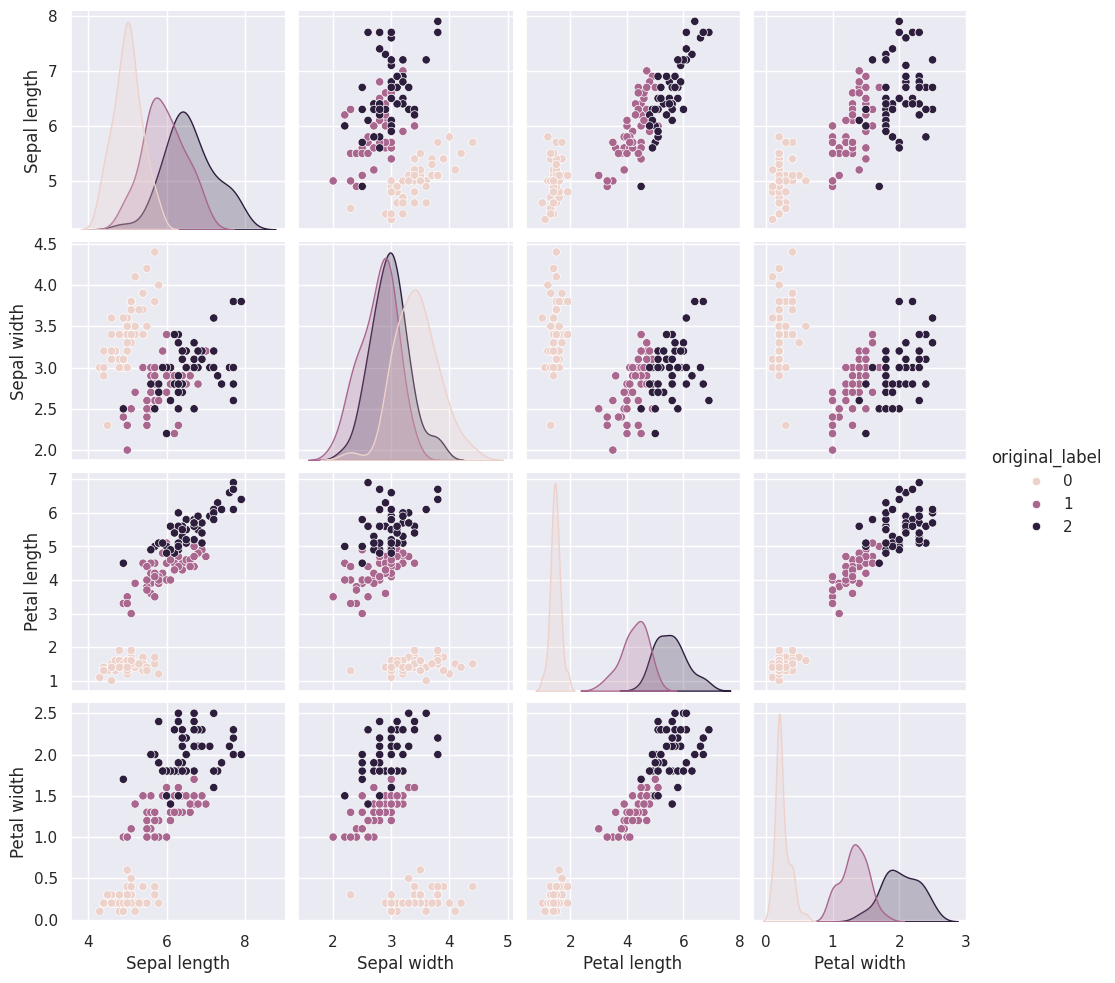

In [ ]:
sns.color_palette("pastel")
sns.pairplot(train, hue='original_label')
plt.show()

In [ ]:
TRAIN_LABEL_COL = "original_label"
TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X = train[TRAIN_FEATURES]
y = train[TRAIN_LABEL_COL]

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
y_pred = dbscan.fit_predict(X)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
y_arr = np.array(y)

In [ ]:
y_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dbscan.components_[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
x = X.loc[:,:].values

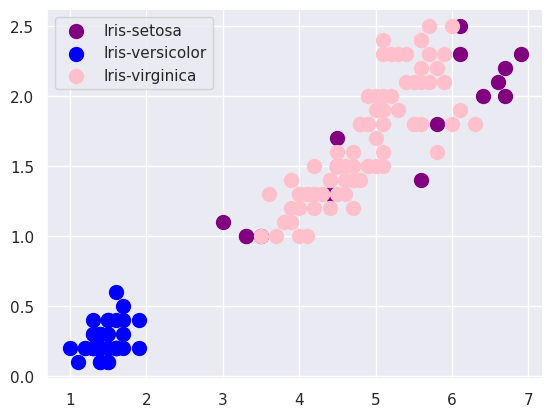

In [ ]:
plt.scatter(x[y_pred==-1, 2], x[y_pred==-1, 3], s=100, c='purple', label = 'Iris-setosa')
plt.scatter(x[y_pred==0, 2], x[y_pred==0, 3], s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_pred==1, 2], x[y_pred==1, 3], s=100, c='pink', label = 'Iris-virginica')
plt.legend()

# K Means

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

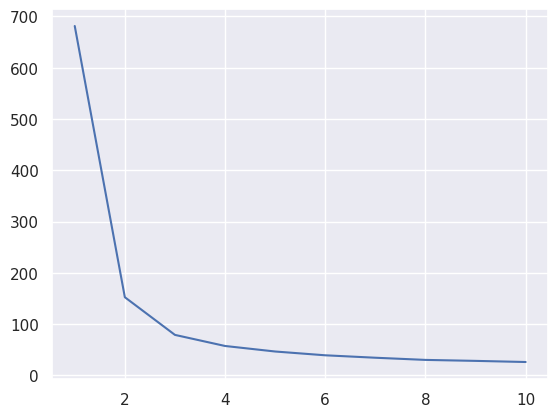

In [ ]:
plt.plot(range(1,11), wcss)

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

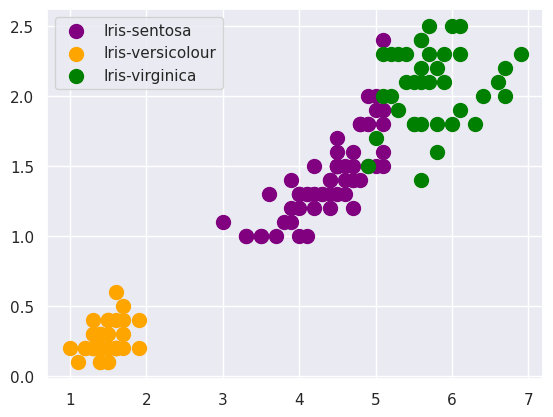

In [ ]:
plt.scatter(x[y_pred==0, 2], x[y_pred==0, 3], s=100, c='purple', label='Iris-sentosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

# Hierarchical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

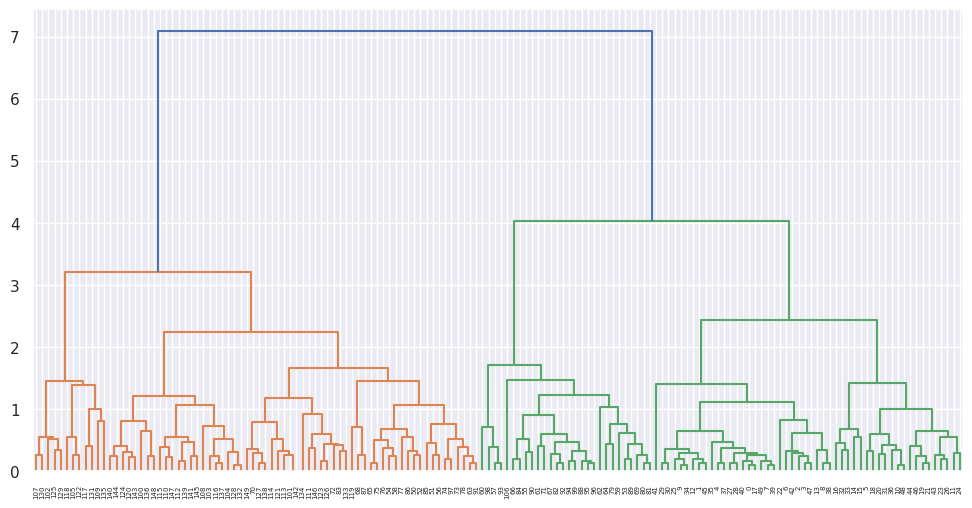

In [ ]:
dist = linkage(X, method='complete')
plt.figure(figsize=(12,6))
dendrogram(dist, leaf_rotation=90)
plt.show()

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
label = ac.fit_predict(X)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

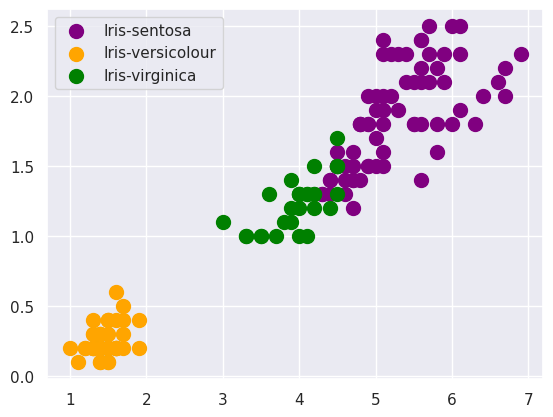

In [ ]:
plt.scatter(x[label==0, 2], x[label==0, 3], s=100, c='purple', label='Iris-sentosa')
plt.scatter(x[label == 1, 2], x[label == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[label == 2, 2], x[label == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

# Optics

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
optic = OPTICS(min_samples=5, eps = 0.5, xi = 0.05, min_cluster_size=0.2)
optic_labels = optic.fit_predict(X)

In [ ]:
optic_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
y_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

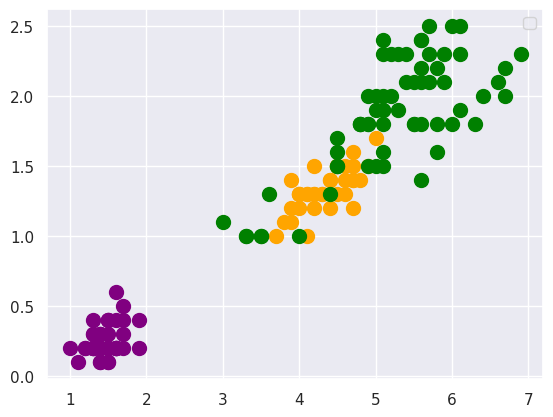

In [ ]:
plt.scatter(x[optic_labels==0, 2], x[optic_labels==0,3], s=100, c='purple')
plt.scatter(x[optic_labels==1, 2], x[optic_labels==1,3], s=100, c='orange')
plt.scatter(x[optic_labels==-1, 2], x[optic_labels==-1,3], s=100, c='green')
plt.legend()

# Birch

In [ ]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [ ]:
birch = Birch(n_clusters=3, threshold=0.5)
birch.fit(X_norm)
bir_labels = birch.labels_

In [ ]:
bir_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

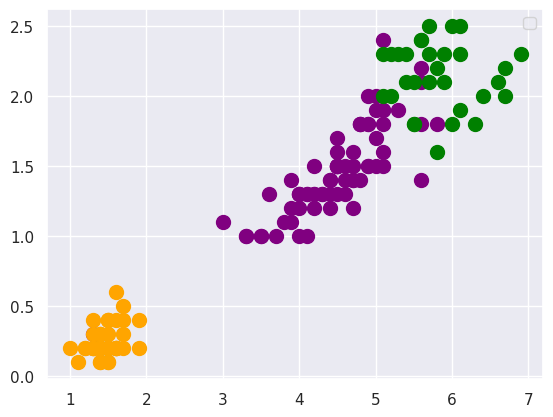

In [ ]:
plt.scatter(x[bir_labels==0, 2], x[bir_labels==0,3], s=100, c='purple')
plt.scatter(x[bir_labels==1, 2], x[bir_labels==1,3], s=100, c='orange')
plt.scatter(x[bir_labels==2, 2], x[bir_labels==2,3], s=100, c='green')
plt.legend()

# For finding number of cluster

In [ ]:
best_score = -1
best_n_clusters = None
for n_clusters in range(3,10):
    # Instantiate the KMeans model
    b = Birch(n_clusters=n_clusters)

    # Fit the model to the data
    b.fit(X)

    # Predict cluster labels
    labels = b.labels_

    # Compute silhouette score
    score = silhouette_score(X, labels)

    # Update best score and corresponding number of clusters if current score is better
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print("Best number of clusters:", best_n_clusters)
print("Corresponding silhouette score:", best_score)

Best number of clusters: 3
Corresponding silhouette score: 0.5019524848046084


# For Spherical Data

<ipython-input-76-e9482c5907d0>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:, 0], X1[:, 1], c=None, s=5, cmap='autumn')


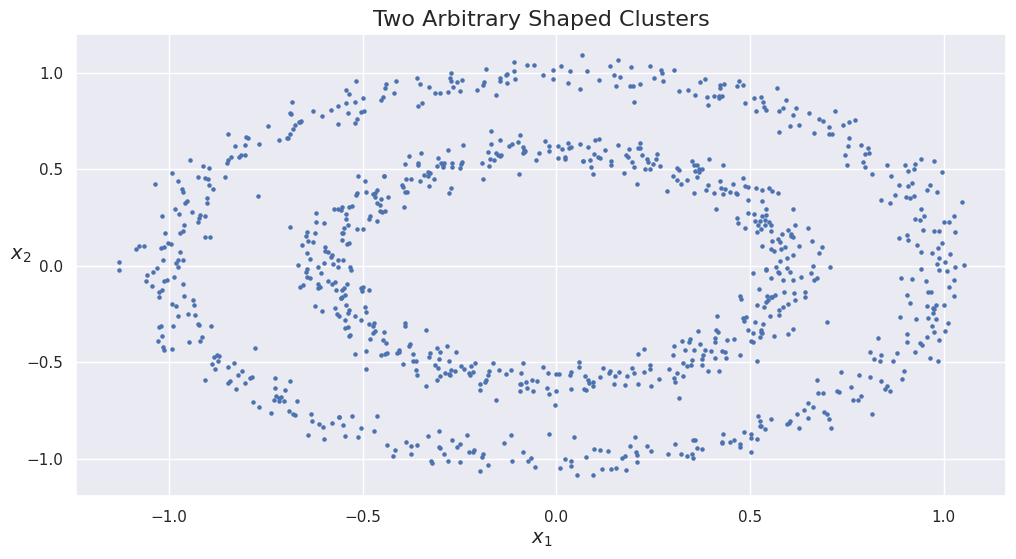

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn import metrics


X1, y1 = make_circles(n_samples=1000, noise=0.05, factor=0.6)

plt.figure(figsize=(12, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=None, s=5, cmap='autumn')

plt.title("Two Arbitrary Shaped Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
o1 = dbscan.fit_predict(X1)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [ ]:
o1

array([ 0,  1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,
        0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,
        1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  0,  0

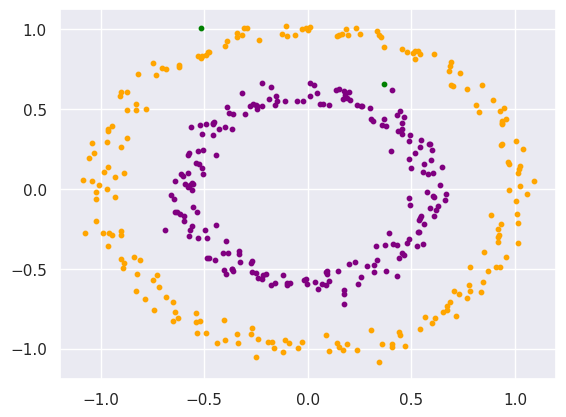

In [ ]:
plt.scatter(X1[o1==0,0], X1[o1==0,1], s=10, c='purple')
plt.scatter(X1[o1==1,0], X1[o1==1,1], s=10, c='orange')
plt.scatter(X1[o1==-1,0], X1[o1==-1,1], s=10, c='green')

In [ ]:
X1[:5]

array([[-0.53525387, -0.14814228],
       [-0.96784262, -0.00299416],
       [-0.50655799,  0.09078634],
       [ 0.28362868, -0.48281727],
       [ 0.9260848 ,  0.48498055]])

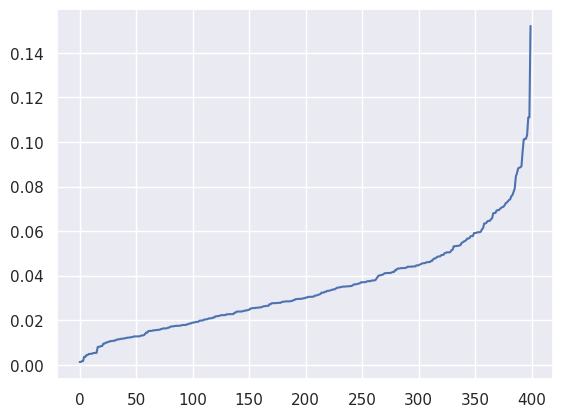

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X1)
distances, indices = neighbors_fit.kneighbors(X1)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)